## 0.1  Final Project Submission

Please fill out:


Student name: Monica Haderthauer and Henry 

Student pace: full time

Scheduled project review date/time: Friday, 4/22

Instructor name: Praveen Gowtham

## Import 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Column Values

In [5]:
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

In [ ]:
# delete MartitalStatus, Gender, Age? Protected classes


In [6]:
for col in df:
    print(df[col].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

In [7]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x =='No' else 1)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df['Attrition'].value_counts()
#attrition = no is 1233, much higher rate than turnover of 237 employees

0    1233
1     237
Name: Attrition, dtype: int64

In [10]:
df['EmployeeCount'].unique()

array([1])

In [11]:
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])
#dropping these columns because they each only contain one unique value and will not help analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [13]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
#numeric_columns = df.select_dtypes(include=['int64'])
#numeric_columns

## Correlation

In [15]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

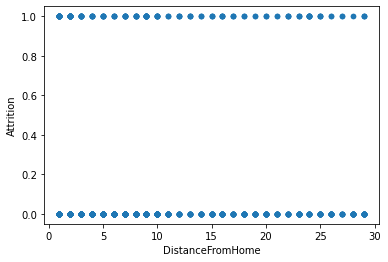

In [16]:
df.plot.scatter('DistanceFromHome','Attrition')

## Encoding 

In [20]:
numeric_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include=['object'])

In [21]:
encodedcats = pd.get_dummies(categorical_cols)
encodecats = pd.concat([encodedcats, numeric_cols], axis = 1)
encodecats.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                 

In [22]:
df.select_dtypes(include = np.number, exclude = object).corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## Heatmap

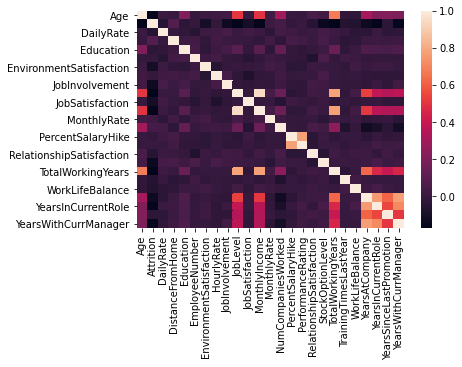

In [23]:
sns.heatmap(df.select_dtypes(include = np.number, exclude = object).corr());

In [24]:
#highly correlated job level and monthly income, 

In [25]:
df[['EmployeeCount']].std()

#if standard deviation is 0, drop them from project because it's a contant 

KeyError: "None of [Index(['EmployeeCount'], dtype='object')] are in the [columns]"

In [26]:
encodecats.corr()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel_Non-Travel,1.000000,-0.162435,-0.526850,-0.004755,-0.005013,0.007283,0.020835,0.005311,-0.030567,0.012828,-0.013389,0.004171,-0.050461,0.050461,0.012878,-0.015890,0.009270,0.014078,-0.013536,-0.021431,-0.010116,0.031022,-0.033780,0.057455,-0.043635,-0.004622,0.037163,-0.037163,-0.011215,-0.074457,0.012096,0.023605,0.004524,0.022272,0.003568,-0.016994,-0.045779,-0.007295,0.019802,-0.017261,0.015279,0.002718,0.036591,0.018310,0.021132,0.028807,-0.029742,-0.020746,0.005780,0.007623,0.011549,0.020815,0.016716
BusinessTravel_Travel_Frequently,-0.162435,1.000000,-0.753092,-0.007485,0.003340,-0.000160,0.011818,0.031128,-0.016586,-0.005367,-0.011004,-0.023569,0.022015,-0.022015,0.008029,0.001896,0.010023,-0.042583,0.009783,-0.023579,-0.004461,-0.010175,0.055469,0.005779,-0.030785,0.027734,-0.029392,0.029392,-0.024743,0.115143,-0.011776,0.005081,-0.008292,-0.007980,-0.012624,-0.018819,0.004424,-0.021557,0.027117,-0.031658,0.000344,-0.039718,-0.006675,0.016463,0.028500,-0.016142,-0.012177,0.006193,0.010199,0.012991,0.001680,0.023216,0.012628
BusinessTravel_Travel_Rarely,-0.526850,-0.753092,1.000000,0.009618,0.000465,-0.004718,-0.024073,-0.030355,0.034668,-0.003930,0.018406,0.017521,0.014682,-0.014682,-0.015503,0.008962,-0.014815,0.027294,0.000598,0.034600,0.010588,-0.011920,-0.025257,-0.043287,0.055613,-0.020808,0.000539,-0.000539,0.028791,-0.049538,0.002078,-0.020116,0.004126,-0.007976,0.008496,0.027541,0.026714,0.023433,-0.036562,0.038779,-0.010484,0.032401,-0.018649,-0.026390,-0.038640,-0.005303,0.030320,0.008498,-0.012640,-0.016274,-0.009147,-0.033877,-0.022023
Department_Human Resources,-0.004755,-0.007485,0.009618,1.000000,-0.290754,-0.139650,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469,-0.035652,0.035652,-0.066186,0.904983,-0.097859,0.087615,-0.070000,-0.050765,-0.105352,-0.112959,-0.051764,0.016037,0.034767,-0.051443,0.006178,-0.006178,0.020523,0.016832,-0.026726,-0.012901,0.011435,0.063431,-0.007597,-0.016551,0.004789,-0.006157,-0.024068,0.006815,-0.024390,0.020618,-0.025888,-0.006385,0.034583,-0.004000,0.007508,-0.040022,0.047763,0.007944,-0.040287,-0.026931,-0.027079
Department_Research & Development,-0.005013,0.003340,0.000465,-0.290754,1.000000,-0.906818,-0.187954,0.127321,-0.478520,0.183548,0.064751,0.038541,-0.015760,0.015760,0.227637,-0.263128,0.336570,-0.071356,0.240754,0.174596,0.362340,-0.733497,-0.336127,0.035158,-0.019997,-0.009990,0.003036,-0.003036,0.017883,-0.085293,0.014871,-0.008117,-0.018604,-0.041923,0.027976,0.018686,0.023187,-0.107830,-0.002798,-0.064720,-0.005453,0.022237,0.030735,0.032720,-0.004587,0.016927,0.011087,-0.006819,-0.069922,-0.032181,-0.028151,-0.021497,-0.014963
Department_Sales,0.007283,-0.000160,-0.004718,-0.139650,-0.906818,1.000000,-0.090275,-0.101791,0.527691,-0.168034,-0.063695,-0.031309,0.032017,-0.032017,-0.206425,-0.126381,-0.305208,0.035248,-0.218320,-0.158327,-0.328576,0.808869,0.370667,-0

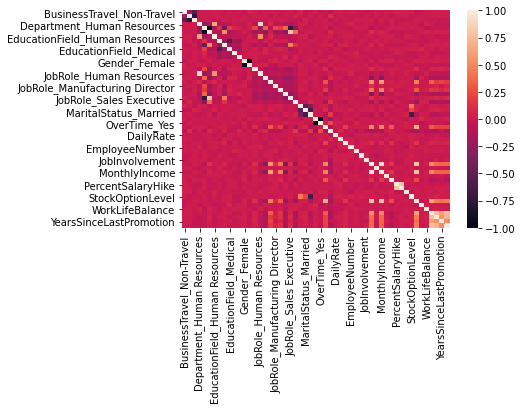

In [27]:
sns.heatmap(encodecats.corr());

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [29]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Train Test Split

In [33]:
y = df['Attrition']
X = df.drop(columns=['Attrition'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Encode Training Set

In [36]:
train_numeric_cols = X_train.select_dtypes(include=np.number)
train_categorical_cols = X_train.select_dtypes(include=['object'])

In [39]:
train_encodedcats = pd.get_dummies(train_categorical_cols)
X_train = pd.concat([train_encodedcats, train_numeric_cols], axis = 1)

In [40]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(108.66993573851775, 210.645, 'X[45] <= 1.5\ngini = 0.271\nsamples = 984\nvalue = [825, 159]'),
 Text(19.57077244258873, 197.055, 'X[26] <= 0.5\ngini = 0.488\nsamples = 57\nvalue = [24, 33]'),
 Text(5.591649269311065, 183.465, 'X[51] <= 0.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(2.7958246346555327, 169.875, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(8.387473903966598, 169.875, 'X[34] <= 44.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(5.591649269311065, 156.285, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.18329853862213, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(33.54989561586639, 183.465, 'X[34] <= 60.5\ngini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(22.36659707724426, 169.875, 'X[20] <= 0.5\ngini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(16.774947807933195, 156.285, 'X[28] <= 33.0\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(13.979123173277664, 142.695, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 

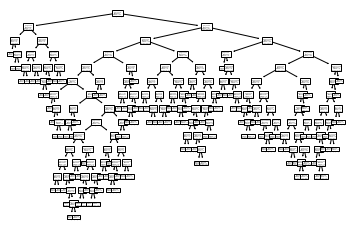

In [41]:
tree.plot_tree(clf)